
# How to work with `.nii` data

[nifti data tutorial](https://dartbrains.org/features/notebooks/3_Introduction_to_NeuroimagingData_in_Python.html)

[nibabel docs](https://nipy.org/nibabel/nibabel_images.html#loading-and-saving)

In [1]:
from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

import matplotlib.pyplot as plt

import os 

In [29]:
data_dir = '/Users/Daphne/data' # local directory

# load in the nifti data using nibabel module
mask_nii = nib.load(os.path.join(data_dir, 'mask.nii'))
brain_nii = nib.load(os.path.join(data_dir, 'mean.nii'))

In [10]:
mask_nii.shape # shapes are different

(79, 95, 79)

In [11]:
brain_nii.shape

(157, 189, 156)

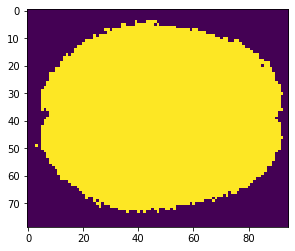

In [13]:
# directly access the data and plot a single slice using standard matplotlib functions.
axial_slice_nosm = mask_nii.get_fdata()[:,:,40]
lateral_slice_nosm = mask_nii.get_fdata()[50,:,:]

plt.imshow(axial_slice_nosm); 

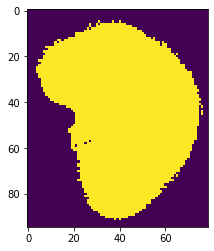

In [14]:
plt.imshow(lateral_slice_nosm); 

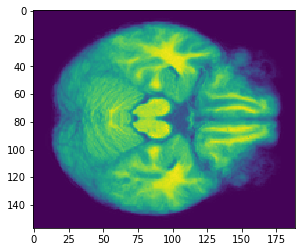

In [15]:
axial_slice_sm = brain_nii.get_fdata()[:,:,50] # [x,y,z] get a slice by setting one dim to a constant value
lateral_slice_sm = brain_nii.get_fdata()[50,:,:]

plt.imshow(axial_slice_sm); # anatomical image

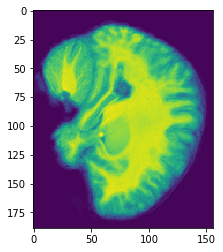

In [16]:
plt.imshow(lateral_slice_sm); 

We continue with the nosmooth nii file

In [18]:
header = mask_nii.header
print(header) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 79 95 79  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'spm_spm:resultant analysis mask'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 78.0
qoffset_y       : -112.0
qoffset_z       : -70.0
srow_x          : [

Some of the important information in the header is information about the orientation of the image in space. This can be represented as the affine matrix.

In [19]:
# The affine matrix is a way to transform images between spaces.
mask_nii.affine

array([[  -2.,    0.,    0.,   78.],
       [   0.,    2.,    0., -112.],
       [   0.,    0.,    2.,  -70.],
       [   0.,    0.,    0.,    1.]])

In [28]:
from nilearn import plotting

In [23]:
view = plotting.view_img(brain_nii, threshold=3)


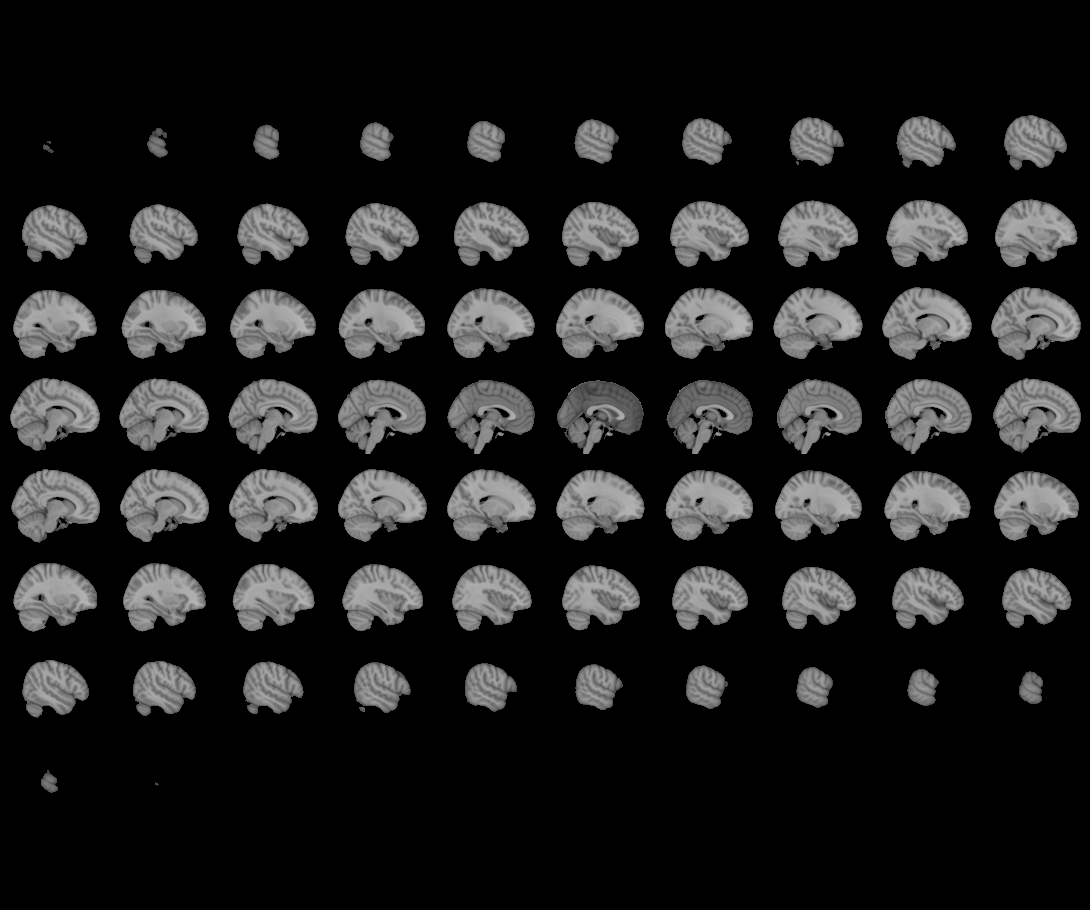
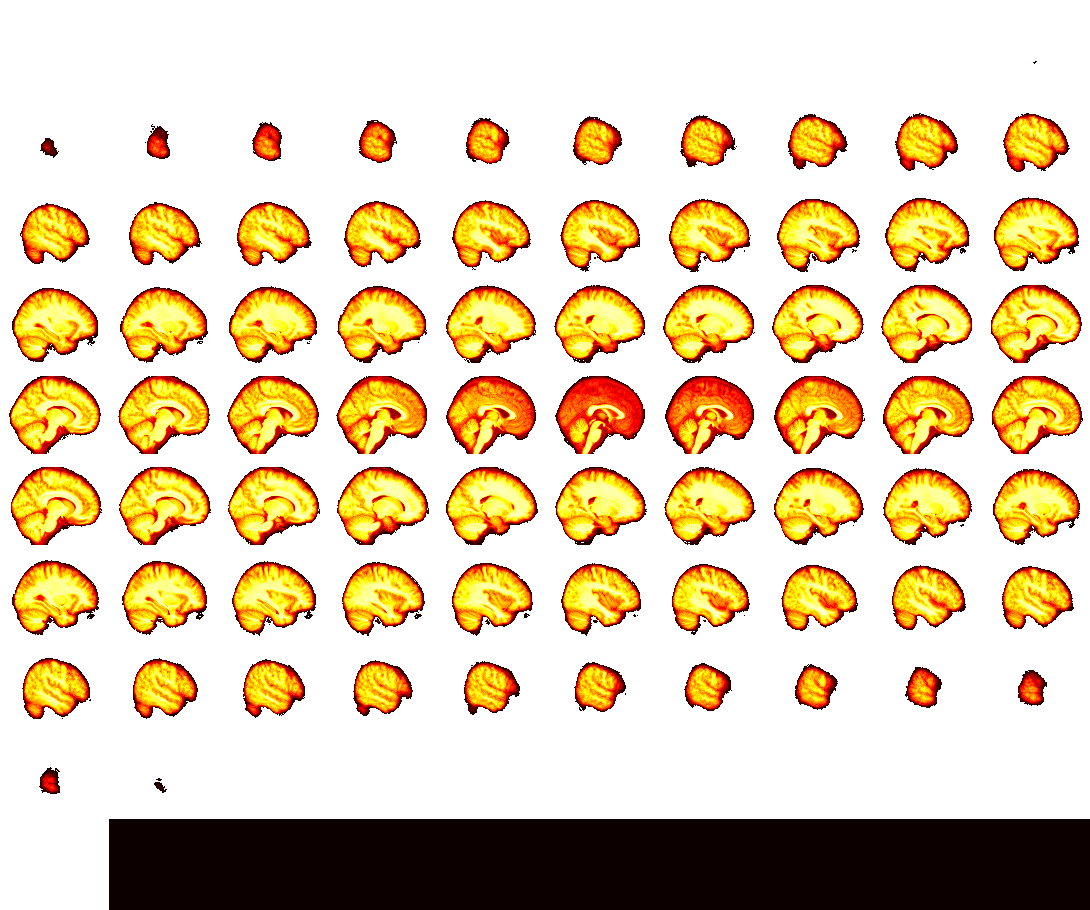

In [24]:
view

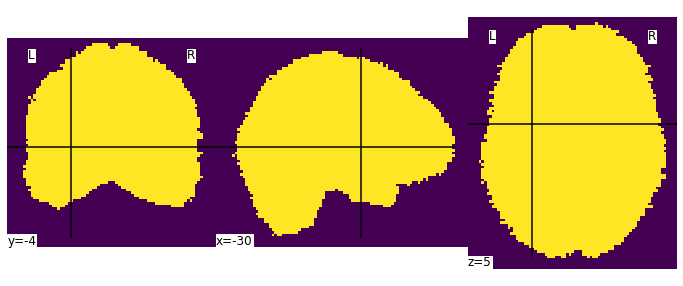

In [26]:
# plot the nii image
f, ax = plt.subplots(1,1, figsize = (12, 5))
plotting.plot_img(
    mask_nii,
    axes=ax,
    cut_coords=[-30, -4, 5]            
);

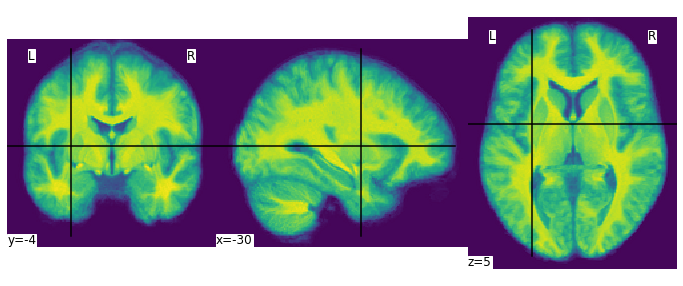

In [27]:
# plot the nii image
f, ax = plt.subplots(1,1, figsize = (12, 5))
plotting.plot_img(
    brain_nii,
    axes=ax,
    cut_coords=[-30, -4, 5]            
);

In this case we use a space defined in terms of the template brain — the **MNI reference space**.

The origin (0, 0, 0) point is defined to be the point that the anterior commissure of the MNI template brain crosses the midline (the AC point).

Axis units are millimeters.

- The Y axis follows the midline of the MNI brain between the left and right hemispheres, going from posterior (negative) to anterior (positive), passing through the AC point. The template defines this line.

- The Z axis is at right angles to the Y axis, going from inferior (negative) to superior (positive), with the superior part of the line passing between the two hemispheres.

- The X axis is a line going from the left side of the brain (negative) to right side of the brain (positive), passing through the AC point, and at right angles to the Y and Z axes.

These axes are defined with reference to the template. The exact position of the Y axis, for example, is somewhat arbitrary, as is the definition of the origin. Left and right are left and right as defined by the template. These are the axes and the space that MNI defines for its template.

A coordinate in this reference system gives a position relative to the particular brain template. It is not a real-world space because it does not refer to any particular place but to a position relative to a template.